In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
events = pd.read_json('events_Spain.json')
players = pd.read_json('players.json')
matches = pd.read_json('matches_Spain.json')


In [12]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = plt.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = plt.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = plt.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = mpatches.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = plt.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = plt.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = mpatches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = mpatches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

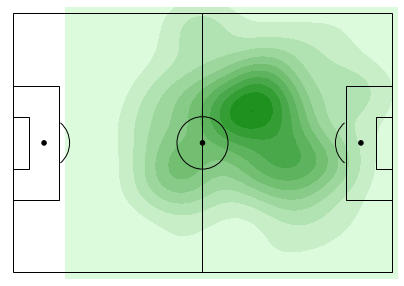

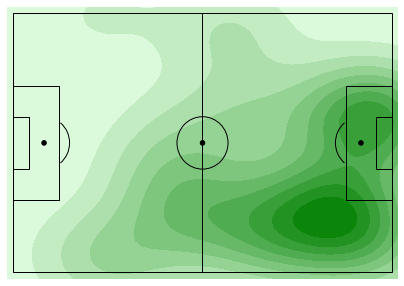

In [13]:
s = ['L. Messi','Cristiano Ronaldo']
for x in s:
    players1 = players.loc[players['shortName'] == x]
    players1 = players1.rename(columns={"wyId":"playerId"})
    matches1 = matches.loc[matches['label'] == 'Barcelona - Real Madrid, 2 - 2']
    matches1 = matches1.rename(columns={"wyId":"matchId"})
    events1 = pd.merge(events,players1,on = "playerId") 
    events2 = pd.merge(events1,matches1,on = "matchId") 
    events3= events2[events2['eventName'].isin(['Duel','Pass','Shot','Free Kick'])]
    events4  = events3.reset_index(drop = True)
    events0 = events3['positions']
    lst0 = []
    lst1 = []
    for rows in events0:
        lst0.append(rows[0])
        lst1.append(rows[1])
    d0 = {"PosPart" : lst0}
    db0 = pd.DataFrame(d0)
    d1 = {"PosArr" : lst1}
    db1 = pd.DataFrame(d1)
    db2 = db0['PosPart']
    db3 = json_normalize(db2)
    db4 = db1['PosArr']
    db5 = json_normalize(db4)
    db6 = db3.rename(columns={'x':'x_part','y' : 'y_part'})
    db7 = db5.rename(columns={'x':'x_arr','y' : 'y_arr'})
    lst2 = [db6,db7,events4]
    events5 = pd.concat(lst2,axis = 1)
    fig=plt.figure() #set up the figures
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax) #overlay our different objects on the pitch
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    plt.axis('off')
    x_coord = [i*1.2 for i in events5["x_part"]]
    y_coord =[i*0.8 for i in events5["y_part"]]
    c = sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 10)
    plt.show()

